In [2]:
import csv
from io import StringIO
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Voice4PD.csv',sep=';',decimal=',')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(data.head())

                   Fichier Classe  Indic. Atonie DDK  Indic. Débit DDK  \
0   HC06-diado_0000H73.wav     HC               2.64              0.73   
1  HC102-diado_0000F68.wav     HC               0.58              0.55   
2  HC107-diado_0000H55.wav     HC               1.88              0.73   
3  HC109-diado_0000F50.wav     HC               0.58              1.53   
4  HC112-diado_0000H58.wav     HC               1.58              0.73   

   Indic. Irrégularité DKK  Indic. Instab. Puissance DDK  
0                     0.70                          0.37  
1                     1.41                          1.29  
2                     0.61                          1.42  
3                     0.64                          1.66  
4                     0.96                          0.58  


In [5]:
print(data.shape)

(113, 6)


In [6]:
print(data.columns)
print(data.dtypes)

Index(['Fichier', 'Classe', 'Indic. Atonie DDK', 'Indic. Débit DDK',
       'Indic. Irrégularité DKK', 'Indic. Instab. Puissance DDK'],
      dtype='object')
Fichier                          object
Classe                           object
Indic. Atonie DDK               float64
Indic. Débit DDK                float64
Indic. Irrégularité DKK         float64
Indic. Instab. Puissance DDK    float64
dtype: object


In [7]:
#print(data.describe(include="all"))

#afficher la colonne 'fichier'
#print(data['Fichier'])
#
print(data.Fichier)

0               HC06-diado_0000H73.wav
1              HC102-diado_0000F68.wav
2              HC107-diado_0000H55.wav
3              HC109-diado_0000F50.wav
4              HC112-diado_0000H58.wav
                    ...               
108     PSP28a-diado-NHI52-7325H66.wav
109    PSP31a- diado-NHI19-7325H71.wav
110     PSP33a-diado-NHI53-7325H54.wav
111     PSP35a-diado-NHI56-7325H70.wav
112     PSP36a-diado-NHI32-7325H64.wav
Name: Fichier, Length: 113, dtype: object


In [8]:
print(data['Classe'].value_counts())

HC     38
PD     35
MSA    28
PSP    12
Name: Classe, dtype: int64


In [9]:
#print(data.loc[data['Classe']=="MSA",:])

In [10]:
print((2/3)*data.shape[0])

75.33333333333333


In [11]:
le = LabelEncoder()
y2 = le.fit_transform(data['Classe'])
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

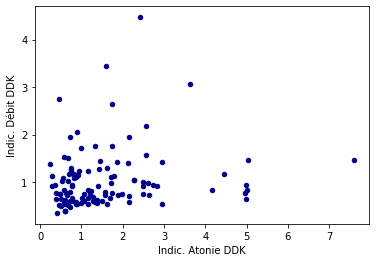

In [12]:
data.plot.scatter(x='Indic. Atonie DDK', y='Indic. Débit DDK', color='DarkBlue')


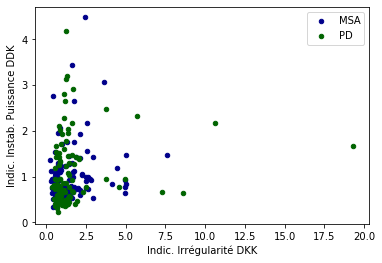

In [13]:
ax = data.plot.scatter(x='Indic. Atonie DDK', y='Indic. Débit DDK', color='DarkBlue', label='MSA');
data.plot.scatter(x='Indic. Irrégularité DKK', y='Indic. Instab. Puissance DDK', color='DarkGreen', label='PD', ax=ax);

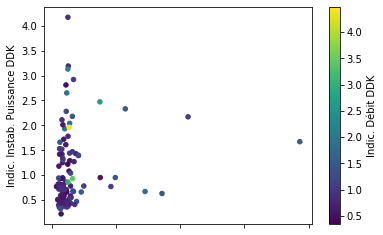

In [14]:
data.plot.scatter(x='Indic. Irrégularité DKK', y='Indic. Instab. Puissance DDK',c='Indic. Débit DDK',colormap='viridis')

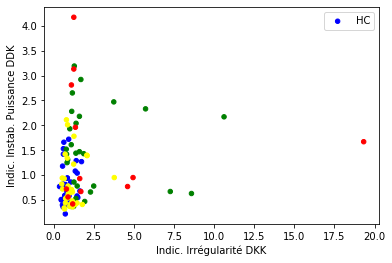

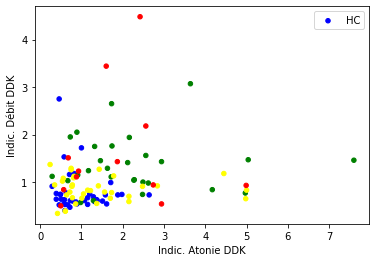

In [15]:
data.plot.scatter(x='Indic. Irrégularité DKK', y='Indic. Instab. Puissance DDK',
                  c=pd.Series(['blue','green','yellow','red'])[y2],label='HC')

data.plot.scatter(x='Indic. Atonie DDK', y='Indic. Débit DDK',
                  c=pd.Series(['blue','green','yellow','red'])[y2],label='HC')

In [16]:
#data2=data
#print(data2['Classe'])
#data2.loc[data2['Classe'] =='HC'] = 0
#data2.loc[data2['Classe'] =='PD'] = 1
#data2.loc[data2['Classe'] =='MSA'] = 2
#data2.loc[data2['Classe'] =='PSP'] = 3


(75, 6)
(38, 6)
[2 1 1 2 0 3 0 0 0 2 0 1 0 2 3 2 0 1 1 3 2 2 0 1 0 0 2 3 2 0 0 2 1 1 3 2 2
 1 1 1 1 3 1 2 1 0 0 0 1 0 0 2 3 0 2 2 1 0 1 0 2 2 0 0 2 0 1 0 0 1 2 0 1 2
 3]
[0.80717525 0.15921316 0.03361159]


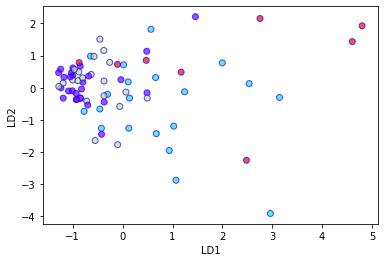

In [17]:
data_train,data_test= train_test_split(data, test_size=0.33)
print(data_train.shape)
print(data_test.shape)


lda = LinearDiscriminantAnalysis()
y=data_train['Classe']
x_train=data_train[['Indic. Atonie DDK','Indic. Débit DDK','Indic. Instab. Puissance DDK','Indic. Irrégularité DKK']]
x_test=data_test[['Indic. Atonie DDK','Indic. Débit DDK','Indic. Instab. Puissance DDK','Indic. Irrégularité DKK']]
classe_test=data_test[['Classe']]

y_train = le.fit_transform(data_train['Classe'])
print(y_train)

X_lda = lda.fit_transform(x_train, y_train)
print(lda.explained_variance_ratio_)


#data as a function of the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)



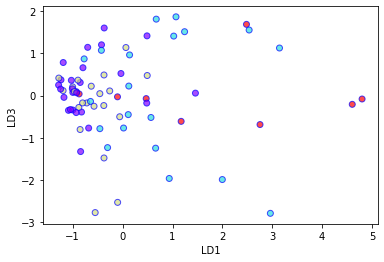

In [18]:
plt.xlabel('LD1')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

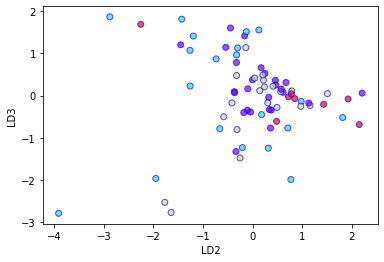

In [19]:
plt.xlabel('LD2')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [21]:
#print(x_test)
#print(classe_test)
#print(data_test)
print(lda.predict([[2.15,0.70,0.53,0.75]]))

[2]
